In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from os.path import join
import os
import pickle
from scipy.io import loadmat, savemat
from scipy.stats import ttest_1samp
from tqdm import tqdm
from nilearn.connectome import ConnectivityMeasure
from itertools import combinations
from nilearn import plotting
import functions.functions as f
from mvmd.mvmd import mvmd
import importlib
importlib.reload(f)  # Reload the module
modules_brain, modules_brain_ranges = f.get_atlas_modules()

# Individual reliability for sFC analysis
In this part we study the reliabiltiy of the individual patterns among individuals. To this aim, we compute the correlation among correlations patterns among all the pairs of individuals.

After the study, the script stores the results in a .csv file

### Reliability analysis MVMD

In [4]:
data_df = pickle.load(open('DATA/mvmd_data_concatenated.pkl', 'rb'))

In [5]:
data_df = data_df[data_df['num_timepoints'].isin([300, 375, 750])]

In [6]:
def reliability_analysis(data_df, experiment_list, out_file_name = None, zFisher_transform=False):
    """
    Perform reliability analysis among different experiments and store the results in a dataframe.

    Args:
    - experiment_details (list): List of dictionaries containing experiment details.
    - data_dir (str): Directory containing data.
    - out_file_name (str): Name of the output file to store results.
    - zFisher_transform (bool): Flag indicating whether to perform zFisher transformation.

    Returns:
    - pd.DataFrame: DataFrame containing reliability analysis results.
    """
    # Initialize list with all the group results
    res_reliability_list = []
    for (r, sr) in experiment_list:

        u_data = f.get_u_data(data_df, run=r, sample_rate=sr)
        print(f" > Loading data for run {r} and sr {sr}...")
        # Load data
        
        # u dim > [sub, mode, ROI, time]
        n_participants, n_modes = len(u_data), len(u_data[0])
        
        # Correlation among modes
        for k in range(n_modes):
            # Determian correlation matrices among particiapnts
            corr_matrices = f.correlation_matrices(u_data=u_data, mode=k, 
                                                    participant_list=range(n_participants),
                                                    zFisher=zFisher_transform)
            # Comparison among participants
            flat_mat_list = []
            for participant in range(n_participants):
                indv_mat = np.array(corr_matrices[participant])
                flat_mat_list.append(indv_mat[np.triu_indices(n=len(indv_mat), k=1)])

            # Take the correlation among participants
            for p_i in range(n_participants):
                for p_j in range(p_i + 1, n_participants):
                    # Estimate correlation of the flat part
                    corr_val = np.corrcoef(flat_mat_list[p_i], flat_mat_list[p_j])[0,1]

                    new_res = {'Mode': int(k+1),
                                'Comp.': [np.array([p_i, p_j])],
                                'Total modes':n_modes,
                                'Correlation': corr_val,
                                'zFisher': zFisher_transform,
                                'Experiment' : f'run_{r}_sr_{sr}',}

                    res_reliability_list.append(new_res)
                    
    print(' > Experiment study completed.')
    
    if out_file_name is not None:            
        with open(out_file_name, 'wb') as outp:
            pickle.dump(pd.DataFrame(res_reliability_list), outp, pickle.HIGHEST_PROTOCOL)

        print(">>> Results were stored into a pickle")
                        
    return pd.DataFrame(res_reliability_list)

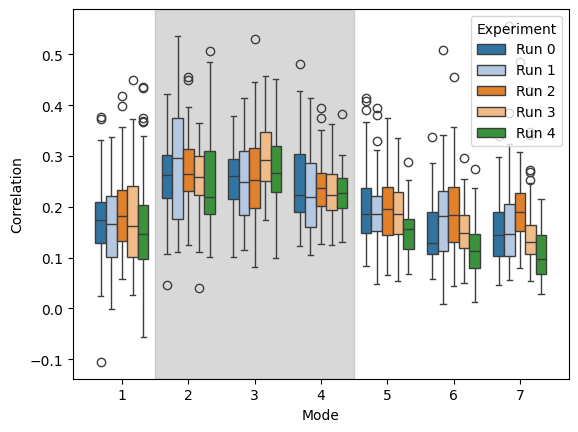

In [ ]:
sns.boxplot(x='Mode', y='Correlation', hue='Experiment', palette="tab20", data=df_reliability_results, width=0.8)

# Add a rectangular shadow between ticks 1 and 4
plt.axvspan(1 - 0.5, 4 - 0.5, color='gray', alpha=0.3)  # Adjust the alpha for transparency

plt.savefig('Figures/Run1903/Reliability/with_shadow.png', dpi=300, bbox_inches='tight')
plt.show()

In [1]:
data_df

NameError: name 'data_df' is not defined

 > Loading data for run 0 and sr 0.8...
 > Loading data for run 1 and sr 0.8...
 > Loading data for run 2 and sr 0.8...
 > Loading data for run 3 and sr 0.8...
 > Loading data for run 4 and sr 0.8...
 > Experiment study completed.


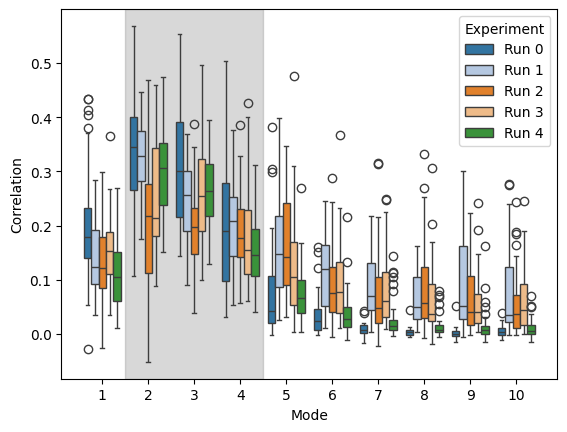

In [ ]:
exp_list = [(0, 0.8), (1, 0.8), (2, 0.8), (3, 0.8), (4, 0.8)]
df_reliability_results = reliability_analysis(data_df, exp_list, zFisher_transform=False)
df_reliability_results['Experiment'] = df_reliability_results['Experiment'].apply(lambda x: f"Run {x.split('_')[1]}")
sns.boxplot(x='Mode', y='Correlation', hue='Experiment', palette="tab20", data=df_reliability_results, width = 0.8)
plt.axvspan(1 - 0.5, 4 - 0.5, color='gray', alpha=0.3)  
plt.savefig('Figures/Run1903/Reliability/0.8.png', dpi=300, bbox_inches='tight')

 > Loading data for run 0 and sr 2...
 > Loading data for run 1 and sr 2...
 > Loading data for run 2 and sr 2...
 > Loading data for run 3 and sr 2...
 > Loading data for run 4 and sr 2...
 > Experiment study completed.


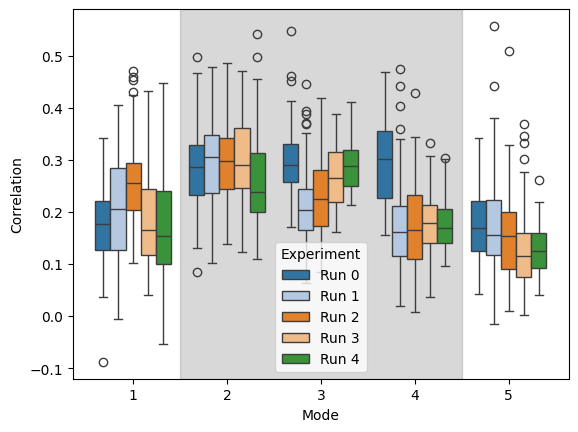

In [8]:
exp_list = [(0, 2), (1, 2), (2, 2), (3, 2), (4, 2)]
df_reliability_results = reliability_analysis(data_df, exp_list, zFisher_transform=False)
df_reliability_results['Experiment'] = df_reliability_results['Experiment'].apply(lambda x: f"Run {x.split('_')[1]}")
sns.boxplot(x='Mode', y='Correlation', hue='Experiment', palette="tab20", data=df_reliability_results, width = 0.8)
plt.axvspan(1 - 0.5, 4 - 0.5, color='gray', alpha=0.3)  # Adjust the alpha for transparency
#plt.savefig('Figures/Run1903/Reliability/2.png', dpi=300, bbox_inches='tight')

 > Loading data for run 0 and sr 2...
 > Loading data for run 1 and sr 2...
 > Loading data for run 2 and sr 2...
 > Loading data for run 3 and sr 2...
 > Loading data for run 4 and sr 2...
 > Experiment study completed.


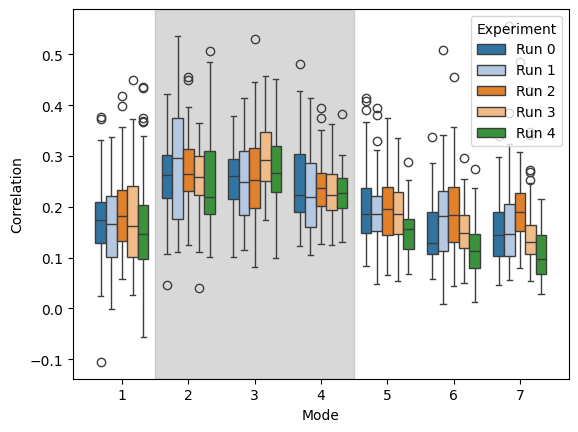

In [ ]:
exp_list = [(0, 2), (1, 2), (2, 2), (3, 2), (4, 2)]
df_reliability_results = reliability_analysis(data_df, exp_list, zFisher_transform=False)
df_reliability_results['Experiment'] = df_reliability_results['Experiment'].apply(lambda x: f"Run {x.split('_')[1]}")
sns.boxplot(x='Mode', y='Correlation', hue='Experiment', palette="tab20", data=df_reliability_results, width = 0.8)
plt.axvspan(1 - 0.5, 4 - 0.5, color='gray', alpha=0.3)  # Adjust the alpha for transparency
plt.savefig('Figures/Run1903/Reliability/2.png', dpi=300, bbox_inches='tight')

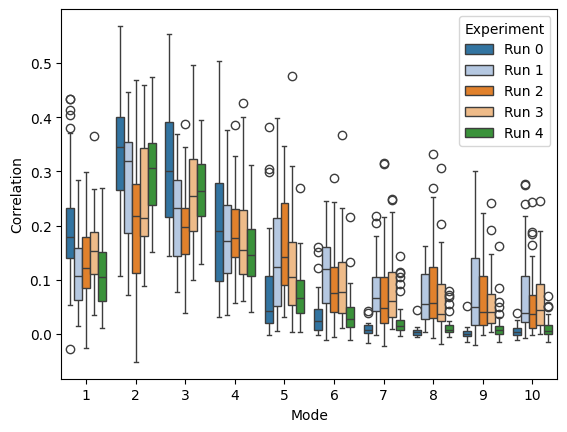

In [ ]:
sns.boxplot(x='Mode', y='Correlation', hue='Experiment', palette="tab20", data=df_reliability_results, width = 0.8, )
plt.savefig('Figures/Run1903/Reliability/Reliability 0.8.png', dpi=300, bbox_inches='tight')

<Axes: xlabel='Mode', ylabel='Correlation'>

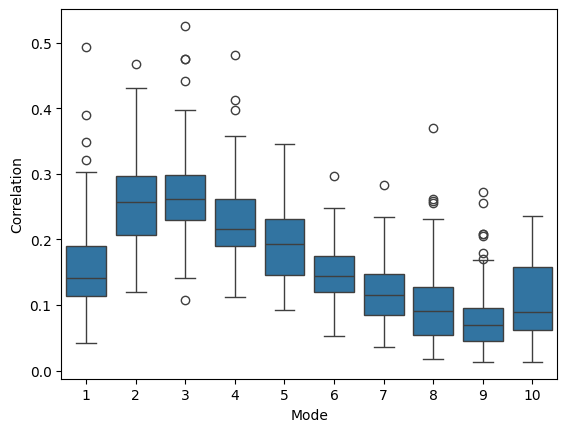

In [ ]:
sns.boxplot(x='Mode', y='Correlation', data=df_reliability_res)